# Logistic Regression, Bayes and EM

In [70]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
def plot_decision_regions(X, y, classifier, resolution=0.01, title=""):

    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.title(title)
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    plt.show()

## Feature selection 


In [72]:
dataset = pd.read_csv('data.csv')

In [73]:
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [74]:
X = dataset.drop(columns=['price'], axis=1)
y = dataset['price']

1. pearson_correlation - calculate pearson correlation for two given arrays.
2. feature_selection - select the best n features.


Our task is to select the best features using Pearson correlation. 

In [75]:
from utils import feature_selection

In [76]:
# test FeatureSelection on the data
feature_selection(X, y)

['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

In [77]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values

In [78]:
def visualize_data(X, y, title_prefix=""):
    if title_prefix is None or title_prefix == "":
        title_prefix = ""
    else:
        title_prefix = f"{title_prefix} - "

    # prepare data
    classes = np.unique(y_training)
    X_1000 = X[:1000, :]
    y_1000 = y[:1000]

    # hist for first feature - first 1000 data points:
    plt.figure(figsize=(8, 5))

    for i in range(len(classes)):
        data = X_1000[y_1000 == classes[i]][:, 0]
        plt.hist(data, bins=20, alpha=0.5, label=['class={}'.format(i)])  # `density=False` would make counts

    plt.xlabel('x1 feature')
    plt.ylabel('Amount')
    plt.title(f'{title_prefix}histogram of first 1000 data points of each class')
    plt.grid()
    plt.legend()
    plt.show()

    # hist for first feature - all data points:
    plt.figure(figsize=(8, 5))

    for i in range(len(classes)):
        data = X[y == classes[i]][:, 0]
        plt.hist(data, bins=20, alpha=0.5, label=['class={}'.format(i)])  # `density=False` would make counts

    plt.xlabel('x1 feature')
    plt.ylabel('Amount')
    plt.title(f'{title_prefix}histogram of all data points of each class')
    plt.grid()
    plt.legend()
    plt.show()

    # scatter for both features - first 1000 data points:
    plt.figure(figsize=(8, 5))
    for i in range(len(classes)):
        data = X_1000[y_1000 == classes[i]]
        plt.scatter(data[:, 0], data[:, 1], label='class={}'.format(i))

    plt.title(f'{title_prefix}scatter plot for first 1000 data points of each class')
    plt.legend()
    plt.xlabel('x1 feature units')
    plt.ylabel('x2 feature units')
    plt.grid()
    plt.show()

    # scatter for both features - all data points:
    plt.figure(figsize=(8, 5))
    for i in range(len(classes)):
        data = X[y == classes[i]]
        plt.scatter(data[:, 0], data[:, 1], label='class={}'.format(i))

    plt.title(f'{title_prefix}scatter plot for all data points of each class')
    plt.legend()
    plt.xlabel('x1 feature units')
    plt.ylabel('x2 feature units')
    plt.grid()
    plt.legend()
    plt.show()


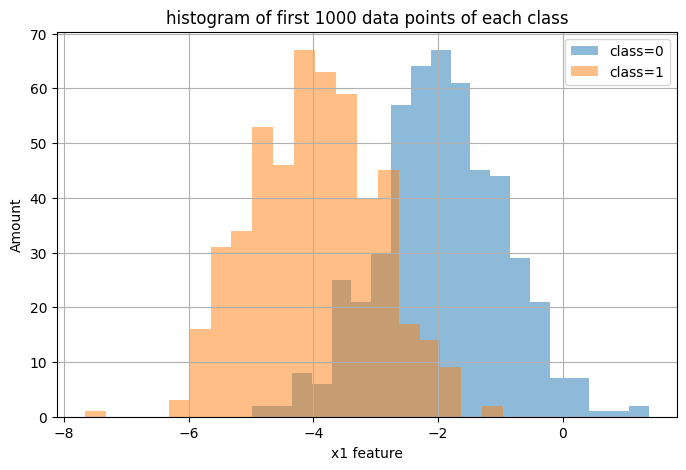

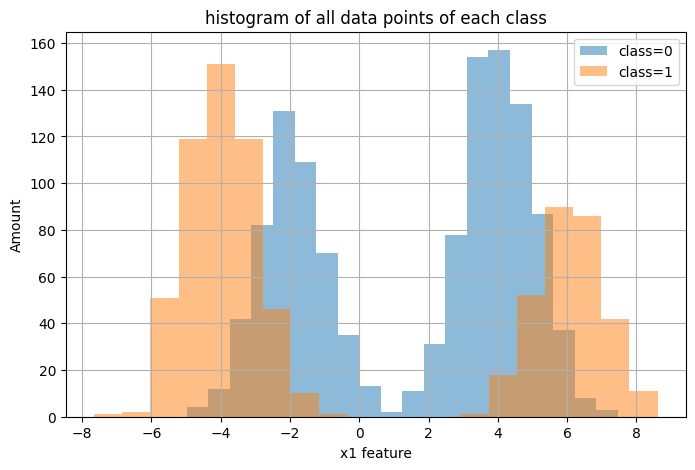

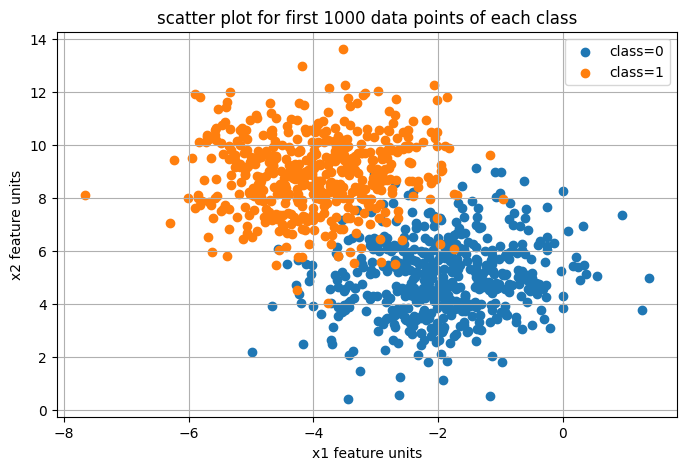

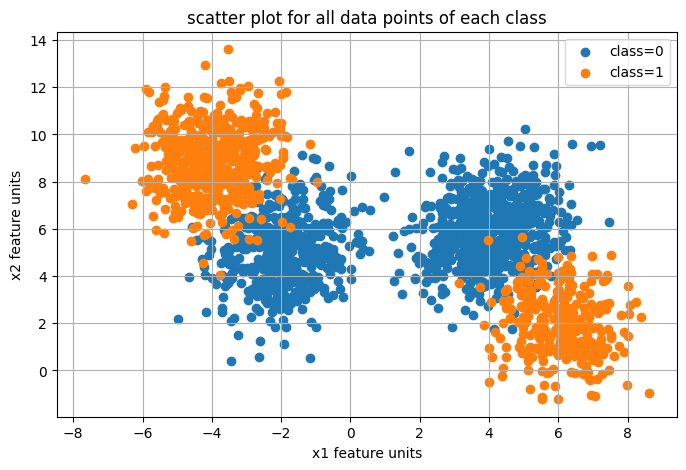

In [79]:
visualize_data(X_training, y_training)

## Logistic Regression 

The Logistic Regression algorithm that uses gradient descent for finding the optimal theta vector. 

Where:
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

$$
J(\theta)=\frac{1}{m} \sum_{d=1}^{m} - y^{(d)}ln(h_\theta(x^{(d)}) - (1 - y^{(d)})ln(1 - h_\theta(x^{(d)})
$$


In [80]:
from LogisticRegressionGD import LogisticRegressionGD

In [81]:
# test lor class on all the data
lor = LogisticRegressionGD()
lor.fit(X_training, y_training)

predictions_x_train = lor.predict(X_training)
predictions_x_test = lor.predict(X_test)

## Cross Validation 

Use 5-fold cross validation in order to find the best eps and eta params from the given lists.

Note the following:
1. This function not change the original data.
1. This function shuffle the data before splitting in order to get correct results.
1. This function return the average accuracy for each fold in order to compare models with different hyper-parameters.


In [82]:
from utils import cross_validation

In [83]:
etas = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
epss = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
folds = 5

random_state = 1
acc_dict = {}
for eta in etas:
    for eps in epss:
        lor = LogisticRegressionGD(eta=eta, eps=eps, random_state=random_state)
        acc = cross_validation(X_training, y_training, folds, lor, random_state=random_state)
        acc_dict[(eta, eps)] = acc
        print(f"Accuracy with eta={eta}, eps={eps}:  {acc:.6f}")

best_params = max(acc_dict, key=acc_dict.get)
best_eta = best_params[0]
best_eps = best_params[1]

Accuracy with eta=0.05, eps=0.01:  0.493500
Accuracy with eta=0.05, eps=0.001:  0.554000
Accuracy with eta=0.05, eps=0.0001:  0.570500
Accuracy with eta=0.05, eps=1e-05:  0.651500
Accuracy with eta=0.05, eps=1e-06:  0.793000
Accuracy with eta=0.005, eps=0.01:  0.395000
Accuracy with eta=0.005, eps=0.001:  0.530500
Accuracy with eta=0.005, eps=0.0001:  0.534500
Accuracy with eta=0.005, eps=1e-05:  0.566500
Accuracy with eta=0.005, eps=1e-06:  0.651000
Accuracy with eta=0.0005, eps=0.01:  0.377500
Accuracy with eta=0.0005, eps=0.001:  0.394000
Accuracy with eta=0.0005, eps=0.0001:  0.546500
Accuracy with eta=0.0005, eps=1e-05:  0.532500
Accuracy with eta=0.0005, eps=1e-06:  0.565000
Accuracy with eta=5e-05, eps=0.01:  0.377500
Accuracy with eta=5e-05, eps=0.001:  0.377500
Accuracy with eta=5e-05, eps=0.0001:  0.394000
Accuracy with eta=5e-05, eps=1e-05:  0.642000
Accuracy with eta=5e-05, eps=1e-06:  0.642000
Accuracy with eta=5e-06, eps=0.01:  0.377500
Accuracy with eta=5e-06, eps=0.001:

In [84]:
print(f"Best learning rate (eta): {best_eta}")
print(f"Best epsilon: {best_eps}")

best_acc = acc_dict[best_params]
print(f"Accuracy with the best parameters: {best_acc:.4f}")

Best learning rate (eta): 0.05
Best epsilon: 1e-06
Accuracy with the best parameters: 0.7930


### Normal distribution pdf 

$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2}
$$



## Expectation Maximization

The Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use -log likelihood as the cost function:
$$
cost(x) = \sum_{d=1}^{m}-log(w * pdf(x; \mu, \sigma))
$$

\* The above is the cost of one gaussian. 

The class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function
1. get_dist_params - return the distribution params


In [91]:
from EM import EM

In [87]:
em_obj = EM(k=2)
em_obj.fit(X_training[:, 0].reshape(-1, 1))

print(f"mus = {em_obj.get_dist_params()[1]}")
print(f"sigmas = {em_obj.get_dist_params()[2]}")
print(f"weights = {em_obj.get_dist_params()[0]}")

mus = [ 4.64171713 -2.96167697]
sigmas = [1.37409689 1.42324485]
weights = [0.50060345 0.49939655]


### GMM

In [88]:
from math_utils import gmm_pdf

## your tests here ## 
gmm_pdf(X_training[:,0].reshape(-1,1),em_obj.get_dist_params()[0], em_obj.get_dist_params()[1],em_obj.get_dist_params()[2])

array([0.07584169, 0.12296061, 0.12811322, ..., 0.01870628, 0.04885573,
       0.13699225])

## Naive Bayes
The Naive Bayes algorithm.


Note the following:
1. The `fit` method train the model given the training data.
1. The `predict` method provide predictions for given instances.

In [94]:
from NaiveBayesGaussian import NaiveBayesGaussian

In [95]:
# test Naive Bayes
naive_byes = NaiveBayesGaussian(k=2)
naive_byes.fit(X_training, y_training)
predictions_x_train = naive_byes.predict(X_training)
predictions_x_test = naive_byes.predict(X_test)
train_acc = np.count_nonzero(predictions_x_train == y_training.reshape(-1, 1)) / len(y_training)
test_acc = np.count_nonzero(predictions_x_test == y_test.reshape(-1, 1)) / len(y_test)
print(f"Naive byes training set accuracy: {train_acc:.4f}")
print(f"Naive byes test set accuracy: {test_acc:.4f}")

Naive byes training set accuracy: 0.9010
Naive byes test set accuracy: 0.8850


## Model evaluation 
This section evaluates two models by fitting them to two datasets.

First 1000 training points and first 500 test points:
1. Select the first 1000 training points (before shuffling) and the first 500 test points.
1. Fit the Logistic Regression model using the best parameters found earlier.
1. Fit the Naive Bayes model, ensuring that the appropriate number of Gaussians is selected for the EM algorithm
1. Print the training and test accuracies for both models.
1. Use the plot_decision_regions function to visualize the decision boundaries for each model (using the training set as input).
1. Plot the cost Vs the iteration number for the Logistic Regression model


In [98]:
from utils import model_evaluation

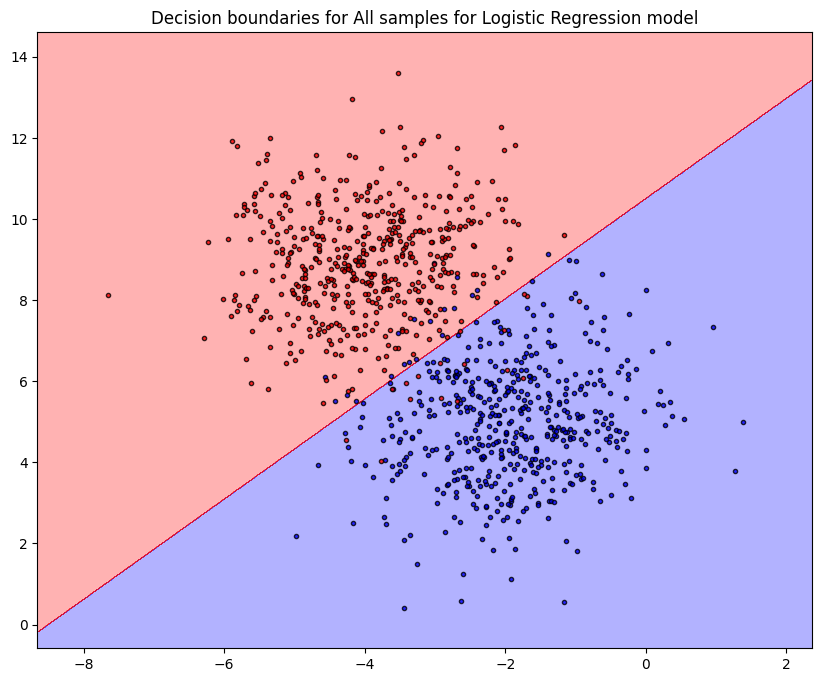

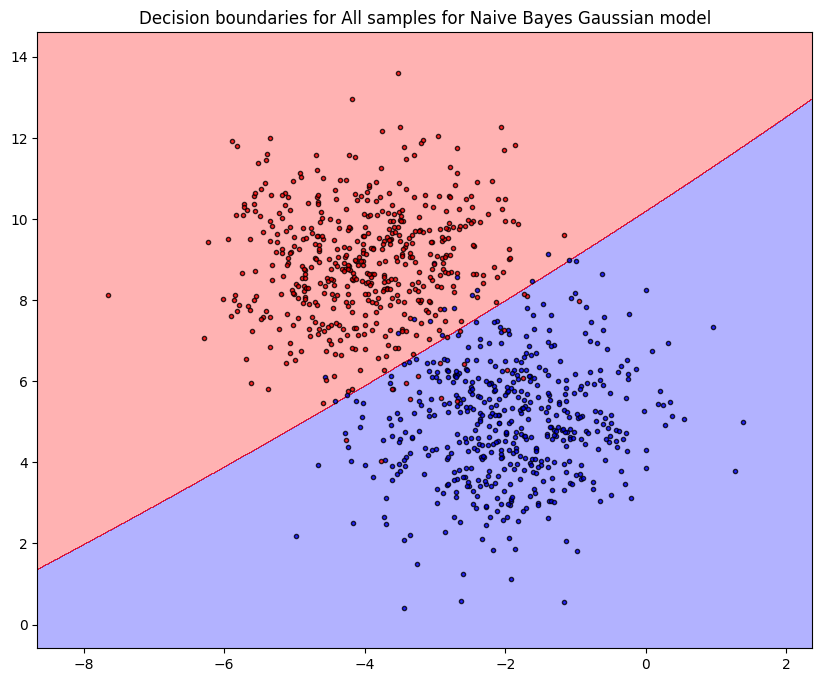

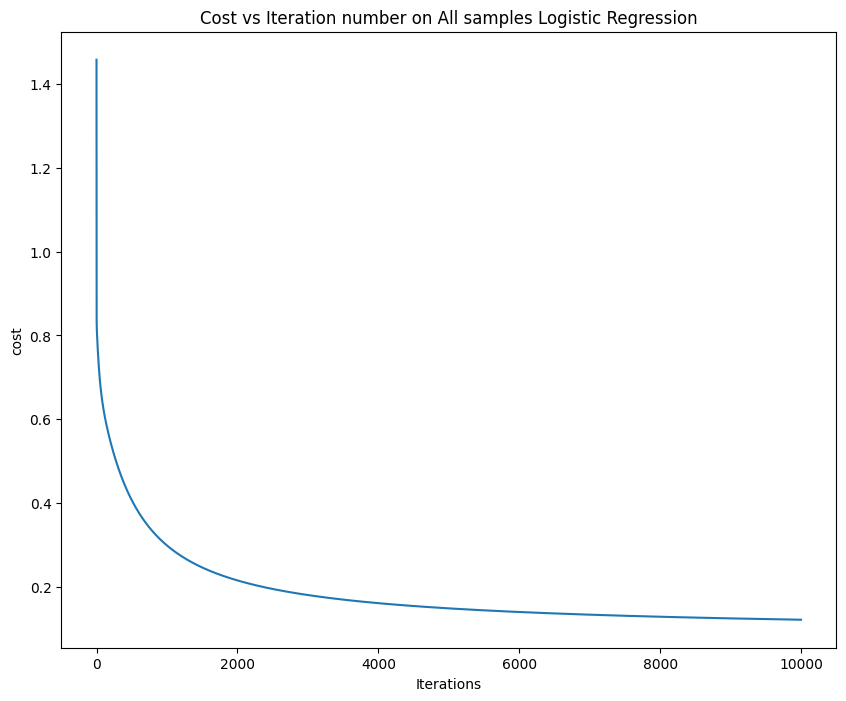

{'lor_train_acc': 0.965,
 'lor_test_acc': 0.938,
 'bayes_train_acc': 0.966,
 'bayes_test_acc': 0.942}

In [99]:
# Train - 1000, Test - 500
X_training_1000 = X_training[:1000, :]
y_training_1000 = y_training[:1000]

X_test_500 = X_test[:500, :]
y_test_500 = y_test[:500]

model_evaluation(X_training_1000, y_training_1000, X_test_500, y_test_500, 1, best_eta, best_eps)

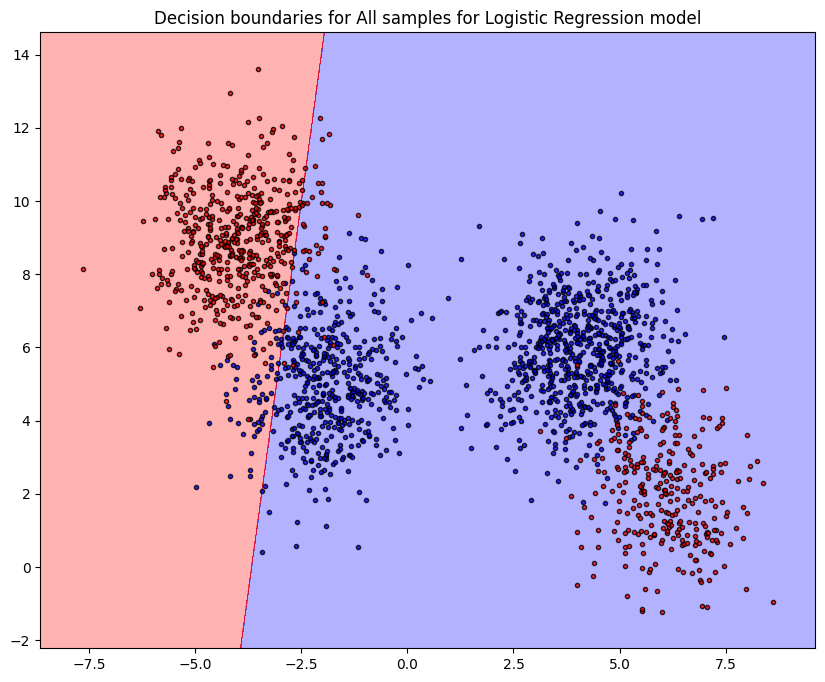

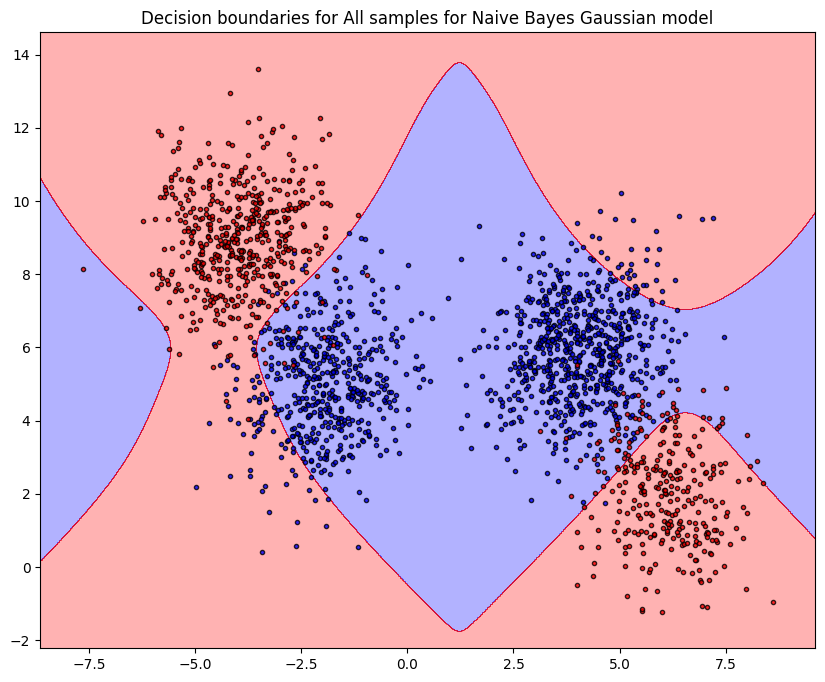

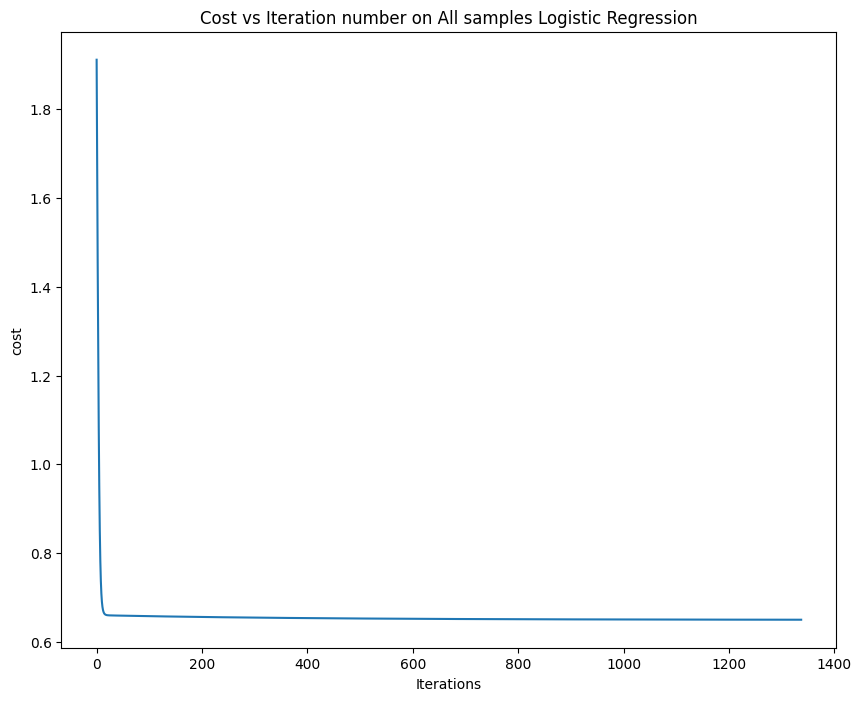

{'lor_train_acc': 0.796,
 'lor_test_acc': 0.792,
 'bayes_train_acc': 0.901,
 'bayes_test_acc': 0.885}

In [101]:
# Full Data
model_evaluation(X_training, y_training, X_test, y_test, 2, best_eta, best_eps)

# We explored two types of models: Naive Bayes using EM, and Logistic regression.  
   1. Generate a dataset (`dataset_a`), in 3 dimensions (3 features), with 2 classes, using **only** Multivariate-Gaussians such that **Naive Bayes will work better on it when compared to Logisitc Regression**.
   2. Generate another dataset (`dataset_b`), in 3 dimensions (3 features), with 2 classes, using **only** Multivariate-Gaussians such that **Logistic Regression will work better on it when compared to Naive Bayes**.

In [102]:
from utils import generate_datasets

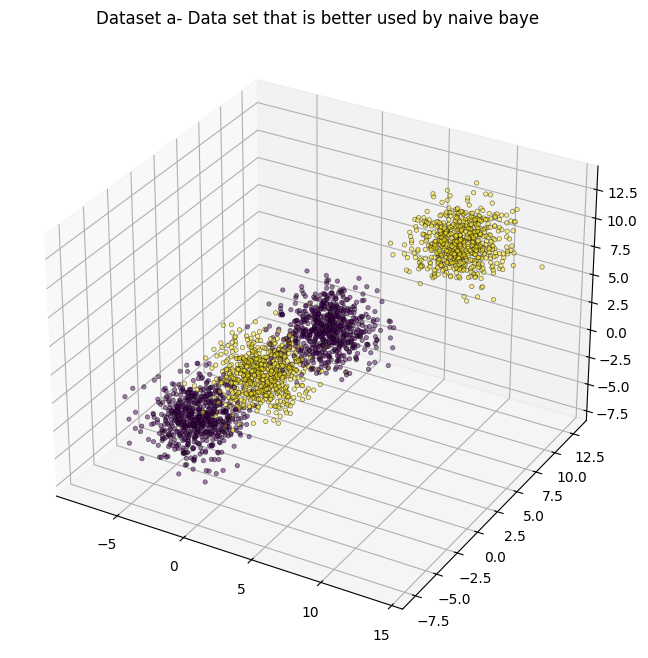

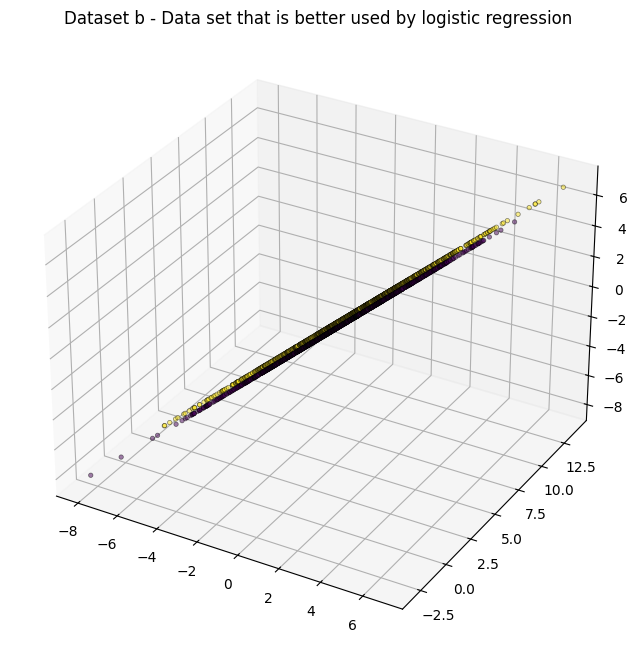

In [103]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate the datasets
datasets = generate_datasets()

def plot_data(features, labels, title):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
        ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=labels, cmap='viridis', s=10, alpha=0.5,
               edgecolors='black', linewidths=0.5)
    
        ax.set_title(title)
        plt.show()

plot_data(datasets['dataset_a_features'], datasets['dataset_a_labels'], "Dataset a- Data set that is better used by naive baye")

plot_data(datasets['dataset_b_features'], datasets['dataset_b_labels'], "Dataset b - Data set that is better used by logistic regression")
